# Task 2 - Regression  

---

Universidade Federal do Rio de Janeiro  
Disciplina: Introdução a Aprendizado de Máquina  
Nome: Luiza Lissandra Rodrigues Rosa  
DRE: 119046349  
  
Regression Objective: Estimate the price of a property based on characteristics such as the type of property (apartment, house, loft or kitchenette), neighborhood where it is located, number of rooms, number of spaces, usable area, extra area and presence of differential elements in relation to other properties, such as barbecue, parking for visitors, swimming pool, playground, sports court, soccer field, party room, games room, gym, sauna and sea view.

In [1]:
# Importing libraries and functions.

import pandas as pd
from sklearn.preprocessing   import LabelBinarizer, MinMaxScaler
from scipy.stats             import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.linear_model    import LinearRegression, Ridge

In [2]:
# Dataframe storage of data for training and testing.

trainingDataframe = pd.read_csv('./conjunto_de_treinamento.csv')
testDataframe = pd.read_csv('./conjunto_de_teste.csv')

print(trainingDataframe.T)

for column in trainingDataframe:
    if column == 'preco':
        break
        
    print('\n%32s:'%column , "%4d categorias abaixo" % \
           len(trainingDataframe[column].unique()))
    
    print('\n', trainingDataframe[column].unique(),'\n') 

                          0                        1             2     \
Id                        2000                     2001          2002   
tipo                      Casa              Apartamento   Apartamento   
bairro             Imbiribeira             Casa Amarela  Encruzilhada   
tipo_vendedor      Imobiliaria              Imobiliaria   Imobiliaria   
quartos                      3                        4             3   
suites                       3                        4             1   
vagas                        5                        2             0   
area_util                  223                      157            53   
area_extra                 167                        0             0   
diferenciais    piscina e copa  piscina e churrasqueira        nenhum   
churrasqueira                0                        1             0   
estacionamento               0                        0             0   
piscina                      1                     

In [3]:
# Remove samples that are off-normal to deal with outliers.

trainingDataframe = trainingDataframe.drop([405, 4004, 2568])

In [4]:
# Apply one-hot-encoding on 'tipo'.

trainingDataframe = pd.get_dummies(trainingDataframe, columns = ['tipo'])
testDataframe = pd.get_dummies(testDataframe, columns = ['tipo'])

In [5]:
# Separate the neighborhoods into zones in the city of Recife.

trainingDataframe['bairro'] = \
    trainingDataframe['bairro'].replace(['Recife','Sto Amaro','Boa Vista','Ilha do Leite',
                             'Paissandu','Sto Antonio', 'S Jose', 'Soledade',
                             'Coelhos', 'Centro'], 'centro')
testDataframe['bairro'] = \
    testDataframe['bairro'].replace(['Recife','Sto Amaro','Boa Vista','Ilha do Leite',
                             'Paissandu','Sto Antonio', 'S Jose', 'Soledade',
                             'Coelhos', 'Centro'], 'centro')
################################################################################  

trainingDataframe['bairro'] = \
    trainingDataframe['bairro'].replace(['Arruda','Campo Grande', 'Encruzilhada', 
                             'Hipodromo', 'Ponto de Parada', 'Rosarinho',
                             'Torreao','Agua Fria', 'Cajueiro',], 'norte')
testDataframe['bairro'] = \
    testDataframe['bairro'].replace(['Arruda','Campo Grande', 'Encruzilhada', 
                             'Hipodromo', 'Ponto de Parada', 'Rosarinho',
                             'Torreao','Agua Fria', 'Cajueiro',], 'norte')
#################################################################################  

trainingDataframe['bairro'] = \
    trainingDataframe['bairro'].replace(['Aflitos','Apipucos', 'Casa Amarela', 'Casa Forte',
                             'Derby', 'Dois Irmaos', 'Espinheiro', 'Gracas',
                             'Jaqueira', 'Monteiro', 'Parnamirim', 'Poco'
                             'Poco da Panela', 'Santana', 'Tamarineira',
                             'Guabiraba', 'Macaxeira', ''], 'noroeste')
testDataframe['bairro'] = \
    testDataframe['bairro'].replace(['Aflitos','Apipucos', 'Casa Amarela', 'Casa Forte',
                             'Derby', 'Dois Irmaos', 'Espinheiro', 'Gracas',
                             'Jaqueira', 'Monteiro', 'Parnamirim', 'Poco'
                             'Poco da Panela', 'Santana', 'Tamarineira',
                             'Guabiraba', 'Macaxeira', ''], 'noroeste')
################################################################################# 

trainingDataframe['bairro'] = \
    trainingDataframe['bairro'].replace(['Cordeiro','Ilha do Retiro', 'Iputinga',
                             'Madalena', 'Benfica', 'Prado', 'Torre', 'Zumbi',
                             'Engenho do Meio', 'Caxanga', 'Cid Universitaria',
                             'Varzea'], 'oeste')
testDataframe['bairro'] = \
    testDataframe['bairro'].replace(['Cordeiro','Ilha do Retiro', 'Iputinga',
                             'Madalena', 'Benfica', 'Prado', 'Torre', 'Zumbi',
                             'Engenho do Meio', 'Caxanga', 'Cid Universitaria',
                             'Varzea'], 'oeste')
#################################################################################  

trainingDataframe['bairro'] = \
    trainingDataframe['bairro'].replace(['Afogados', 'Bongi', 'San Martin', 'Areias',
                             'Estancia', 'Barro', 'Jd S Paulo', 'Sancho',
                             'Tejipio', ''], 'sudoeste')
testDataframe['bairro'] = \
    testDataframe['bairro'].replace(['Afogados', 'Bongi', 'San Martin', 'Areias',
                             'Estancia', 'Barro', 'Jd S Paulo', 'Sancho',
                             'Tejipio', ''], 'sudoeste')
################################################################################# 

trainingDataframe['bairro'] = \
    trainingDataframe['bairro'].replace(['Boa Viagem','Imbiribeira', 'Lagoa do Araca',
                             'Ipsep', 'Pina', 'Beira Rio', 'Cohab', 'Piedade',
                             'Setubal'], 'sul')
testDataframe['bairro'] = \
    testDataframe['bairro'].replace(['Boa Viagem','Imbiribeira', 'Lagoa do Araca',
                             'Ipsep', 'Pina', 'Beira Rio', 'Cohab', 'Piedade',
                             'Setubal'], 'sul')
#################################################################################  

trainingDataframe = pd.get_dummies(trainingDataframe, columns = ['bairro'])
testDataframe = pd.get_dummies(testDataframe, columns = ['bairro'])

In [6]:
# Binarize the "tipo_vendedor" column. 0 = imobiliária, 1 = pessoa física.

print(trainingDataframe['tipo_vendedor'])

binarizer = LabelBinarizer() 

trainingDataframe['tipo_vendedor'] = binarizer.fit_transform(trainingDataframe['tipo_vendedor'])
testDataframe['tipo_vendedor'] = binarizer.fit_transform(testDataframe['tipo_vendedor'])
   
print(trainingDataframe['tipo_vendedor'])   

0       Imobiliaria
1       Imobiliaria
2       Imobiliaria
3       Imobiliaria
4       Imobiliaria
           ...     
4678    Imobiliaria
4679    Imobiliaria
4680    Imobiliaria
4681    Imobiliaria
4682    Imobiliaria
Name: tipo_vendedor, Length: 4680, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
4678    0
4679    0
4680    0
4681    0
4682    0
Name: tipo_vendedor, Length: 4680, dtype: int32


In [7]:
# Transform the representation of differentials into number of differentials [0, 1, 2].

# Two differentiators:
trainingDataframe['diferenciais'] = \
    trainingDataframe['diferenciais'].replace(['piscina e copa', 'piscina e churrasqueira',
 'piscina e playground', 'sauna e playground', 'piscina e sauna',
 'piscina e quadra poliesportiva', 'campo de futebol e playground', 
 'piscina e estacionamento visitantes', 'copa e salao de festas', 
 'esquina e salao de festas', 'piscina e salao de festas', 
 'playground e sala de ginastica', 'copa e playground', 
 'estacionamento visitantes e playground', 'playground e salao de festas', 
 'churrasqueira e playground', 'churrasqueira e copa', 
 'churrasqueira e salao de festas', 'playground e quadra poliesportiva',
 'piscina e esquina', 'copa e esquina',
 'estacionamento visitantes e salao de festas', 'piscina e campo de futebol', 
 'frente para o mar e salao de festas', 'churrasqueira e campo de futebol',
 'piscina e frente para o mar', 'sala de ginastica e salao de festas',
 'sauna e esquina', 'sauna e salao de festas',
 'esquina e playground', 'frente para o mar e playground',
 'salao de festas e salao de jogos', 'sauna e campo de futebol',
 'esquina e quadra poliesportiva', 'piscina e sala de ginastica',
 'frente para o mar e copa', 'churrasqueira e sauna',
 'piscina e children care', 'frente para o mar e esquina',
 'copa e estacionamento visitantes', 'campo de futebol e esquina',
 'churrasqueira e estacionamento visitantes',
 'campo de futebol e estacionamento visitantes',
 'esquina e estacionamento visitantes',
 'frente para o mar e quadra poliesportiva', 'piscina e quadra de squash',
 'quadra poliesportiva e salao de festas', 'esquina e sala de ginastica',
 'salao de festas e vestiario', 'sauna e copa', 'piscina e hidromassagem',
 'churrasqueira e sala de ginastica', 'sauna e frente para o mar',
 'campo de futebol e salao de festas', 'copa e quadra poliesportiva',
 'churrasqueira e esquina', 'sala de ginastica e salao de jogos',
 'churrasqueira e frente para o mar', 'piscina e salao de jogos',
 'sauna e sala de ginastica', 'sauna e quadra poliesportiva',
 'copa e sala de ginastica', 'playground e salao de jogos', 
 'children care e playground',
 'estacionamento visitantes e sala de ginastica',
 'frente para o mar e campo de futebol', 'campo de futebol e copa',
 'campo de futebol e quadra poliesportiva', 'churrasqueira e children care',
 'estacionamento visitantes e salao de jogos', 'hidromassagem e salao de festas',
 'estacionamento visitantes e hidromassagem', 'frente para o mar e hidromassagem',
 'copa e hidromassagem', 'frente para o mar e children care',
 'campo de futebol e sala de ginastica'], 2)
#################################################################################  

testDataframe['diferenciais'] = \
    testDataframe['diferenciais'].replace(['piscina e copa', 'piscina e churrasqueira',
 'piscina e playground', 'sauna e playground', 'piscina e sauna',
 'piscina e quadra poliesportiva', 'campo de futebol e playground', 
 'piscina e estacionamento visitantes', 'copa e salao de festas', 
 'esquina e salao de festas', 'piscina e salao de festas', 
 'playground e sala de ginastica', 'copa e playground', 
 'estacionamento visitantes e playground', 'playground e salao de festas', 
 'churrasqueira e playground', 'churrasqueira e copa', 
 'churrasqueira e salao de festas', 'playground e quadra poliesportiva',
 'piscina e esquina', 'copa e esquina',
 'estacionamento visitantes e salao de festas', 'piscina e campo de futebol', 
 'frente para o mar e salao de festas', 'churrasqueira e campo de futebol',
 'piscina e frente para o mar', 'sala de ginastica e salao de festas',
 'sauna e esquina', 'sauna e salao de festas',
 'esquina e playground', 'frente para o mar e playground',
 'salao de festas e salao de jogos', 'sauna e campo de futebol',
 'esquina e quadra poliesportiva', 'piscina e sala de ginastica',
 'frente para o mar e copa', 'churrasqueira e sauna',
 'piscina e children care', 'frente para o mar e esquina',
 'copa e estacionamento visitantes', 'campo de futebol e esquina',
 'churrasqueira e estacionamento visitantes',
 'campo de futebol e estacionamento visitantes',
 'esquina e estacionamento visitantes',
 'frente para o mar e quadra poliesportiva', 'piscina e quadra de squash',
 'quadra poliesportiva e salao de festas', 'esquina e sala de ginastica',
 'salao de festas e vestiario', 'sauna e copa', 'piscina e hidromassagem',
 'churrasqueira e sala de ginastica', 'sauna e frente para o mar',
 'campo de futebol e salao de festas', 'copa e quadra poliesportiva',
 'churrasqueira e esquina', 'sala de ginastica e salao de jogos',
 'churrasqueira e frente para o mar', 'piscina e salao de jogos',
 'sauna e sala de ginastica', 'sauna e quadra poliesportiva',
 'copa e sala de ginastica', 'playground e salao de jogos', 
 'children care e playground',
 'estacionamento visitantes e sala de ginastica',
 'frente para o mar e campo de futebol', 'campo de futebol e copa',
 'campo de futebol e quadra poliesportiva', 'churrasqueira e children care',
 'estacionamento visitantes e salao de jogos', 'hidromassagem e salao de festas',
 'estacionamento visitantes e hidromassagem', 'frente para o mar e hidromassagem',
 'copa e hidromassagem','frente para o mar e children care', 
 'campo de futebol e sala de ginastica'], 2)

# One differentiator:
trainingDataframe['diferenciais'] = \
    trainingDataframe['diferenciais'].replace(['playground', 'salao de festas',
        'copa', 'esquina', 'piscina','estacionamento visitantes',
        'churrasqueira', 'frente para o mar', 'salao de jogos', 
        'sala de ginastica', 'children care', 'quadra poliesportiva',
        'vestiario', 'sauna'],1)
testDataframe['diferenciais'] = \
    testDataframe['diferenciais'].replace(['playground', 'salao de festas',
        'copa', 'esquina', 'piscina','estacionamento visitantes',
        'churrasqueira', 'frente para o mar', 'salao de jogos', 
        'sala de ginastica', 'children care', 'quadra poliesportiva',
        'vestiario', 'sauna'],1)

# None differentiator:  
trainingDataframe['diferenciais'] = \
    trainingDataframe['diferenciais'].replace('nenhum',0)
testDataframe['diferenciais'] = \
    testDataframe['diferenciais'].replace('nenhum',0)
    
print(trainingDataframe['diferenciais'].T)

0       2
1       2
2       0
3       2
4       2
       ..
4678    2
4679    1
4680    0
4681    2
4682    2
Name: diferenciais, Length: 4680, dtype: int64


C:\Users\luiza\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


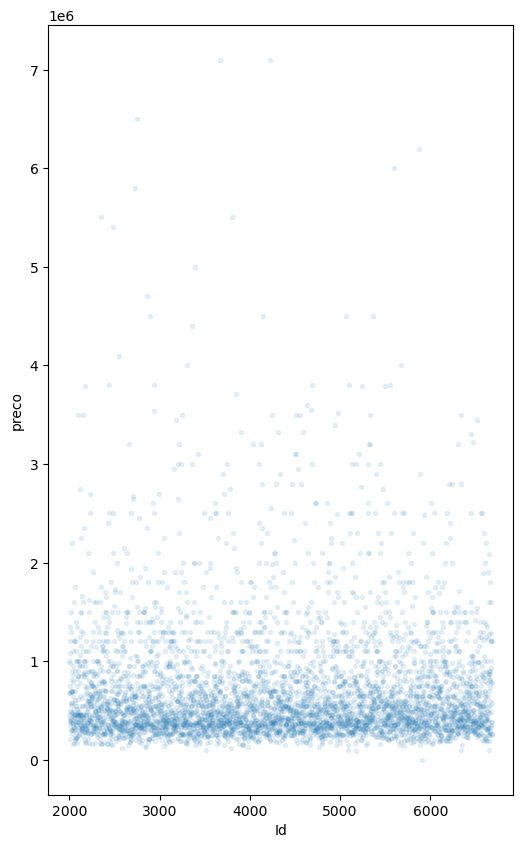

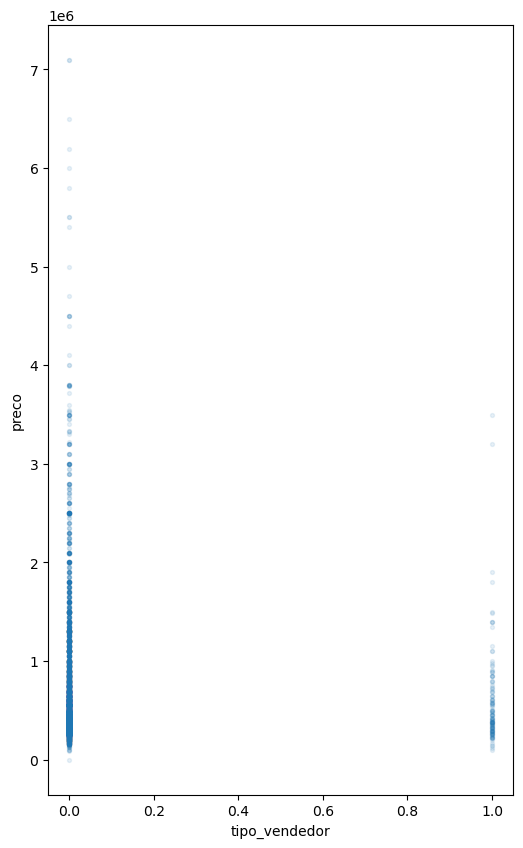

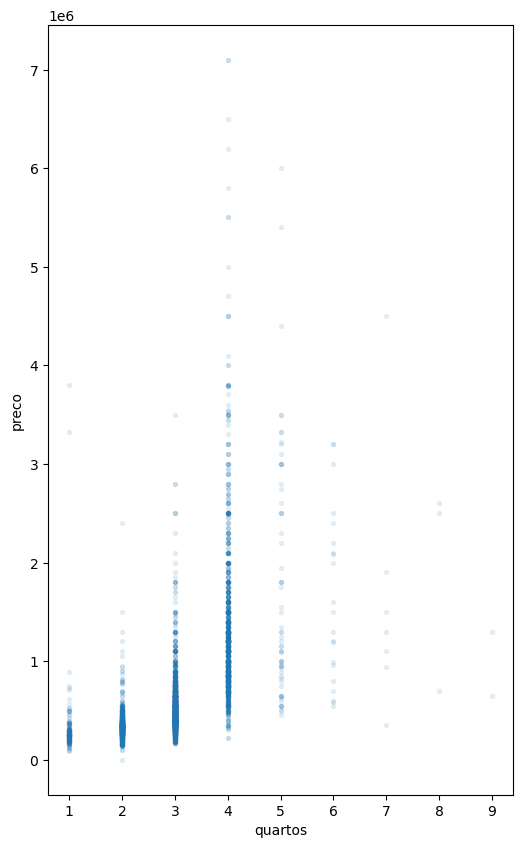

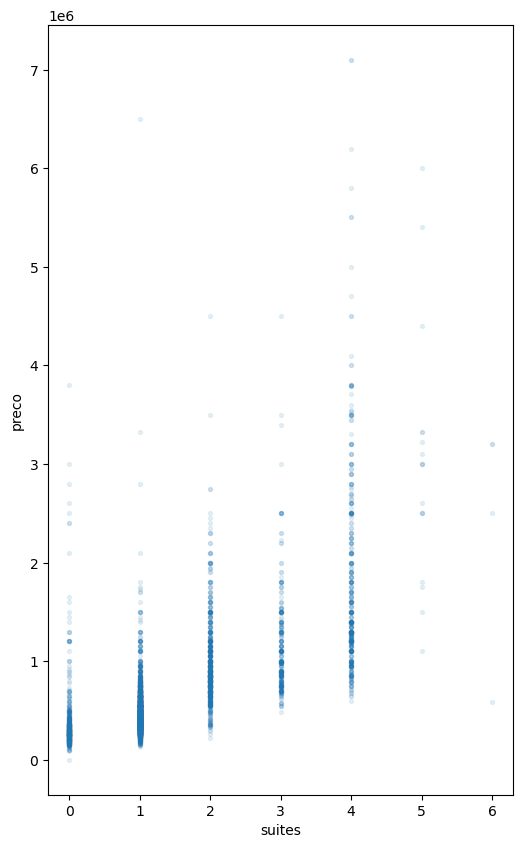

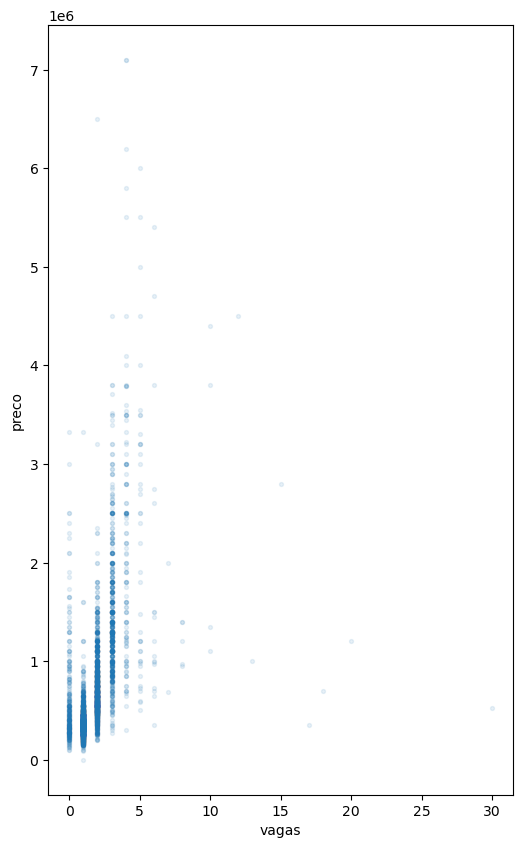

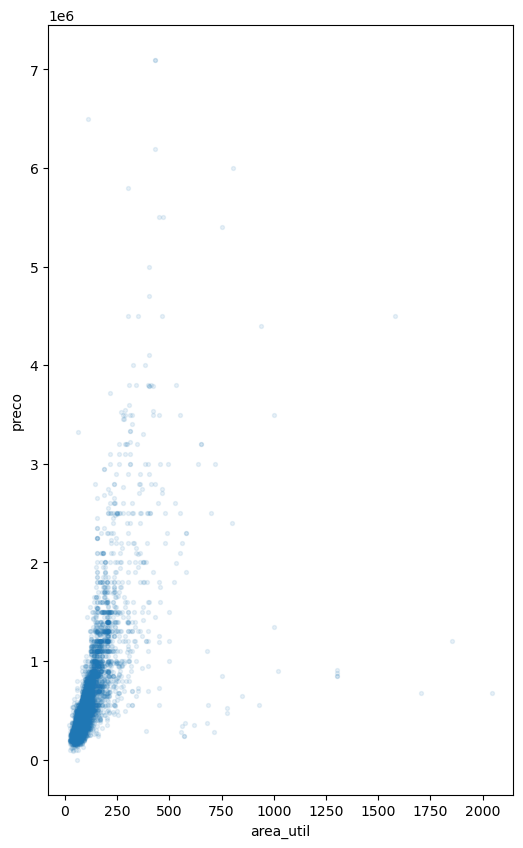

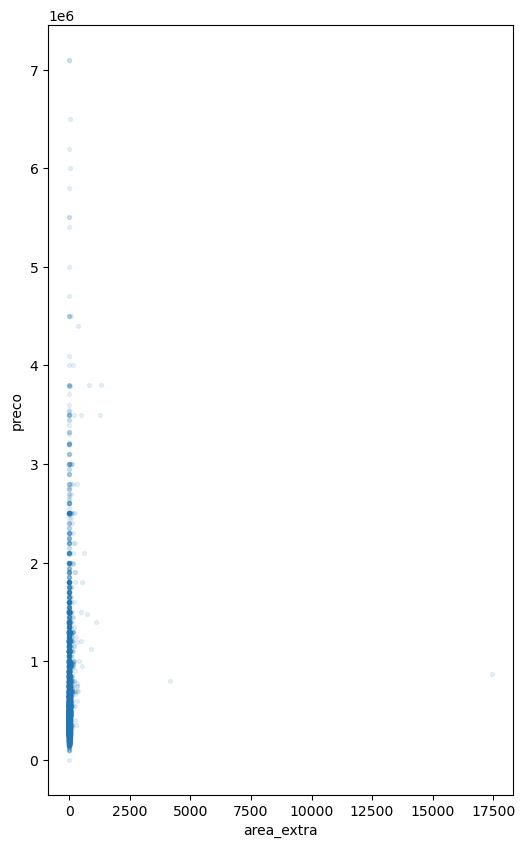

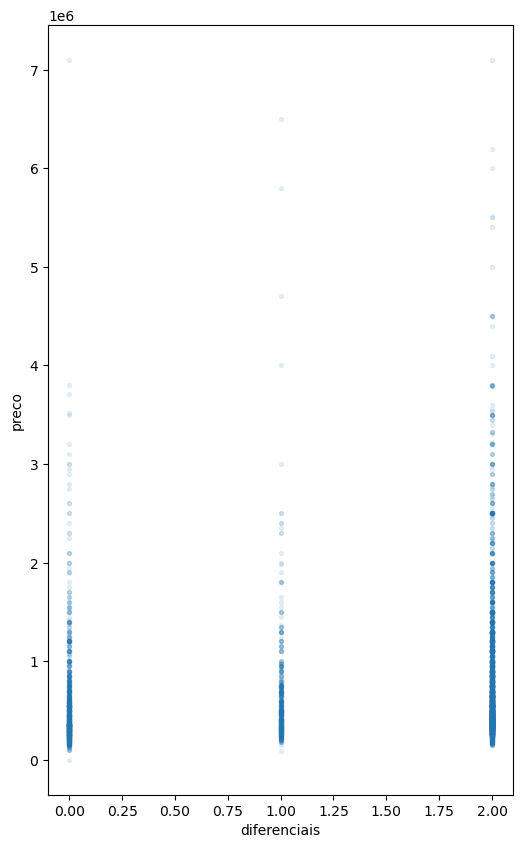

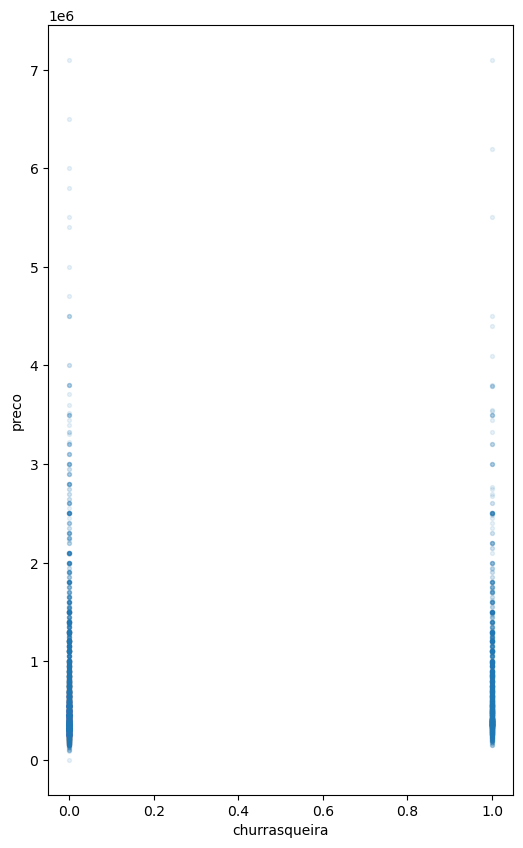

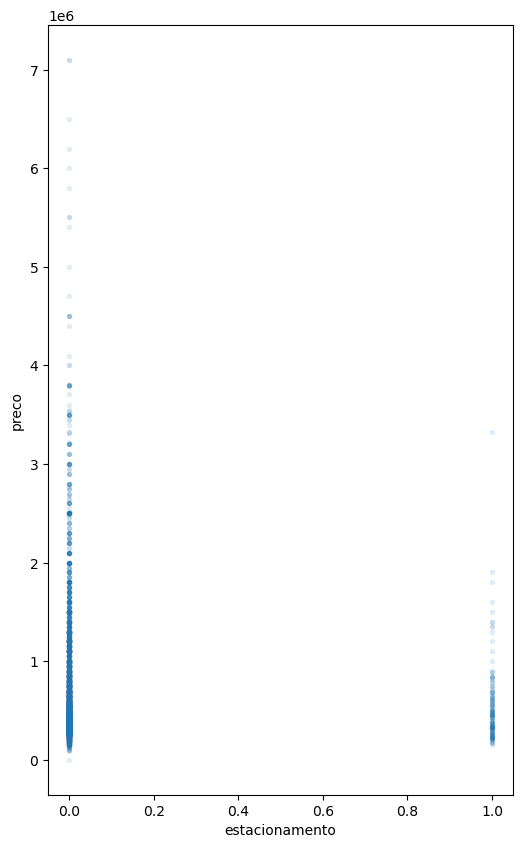

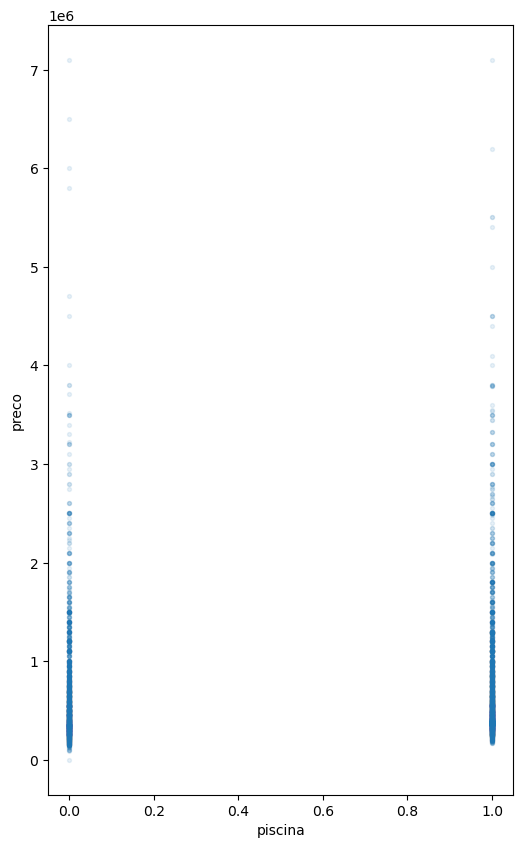

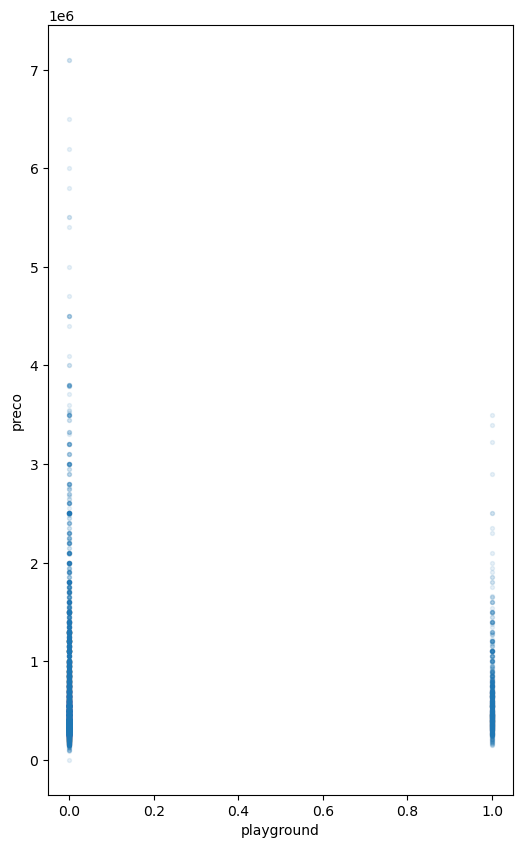

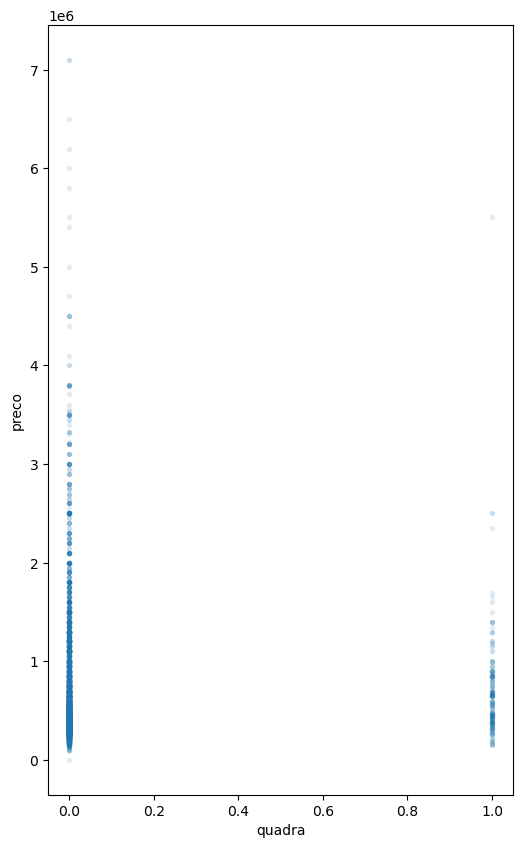

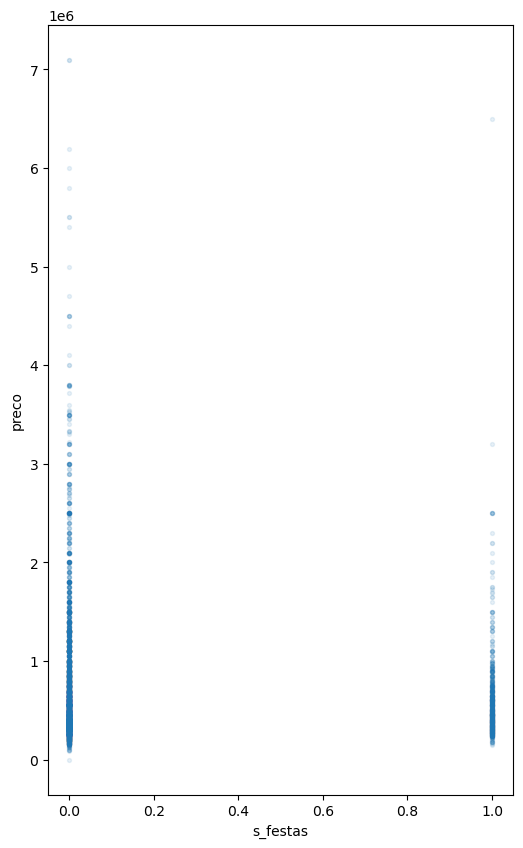

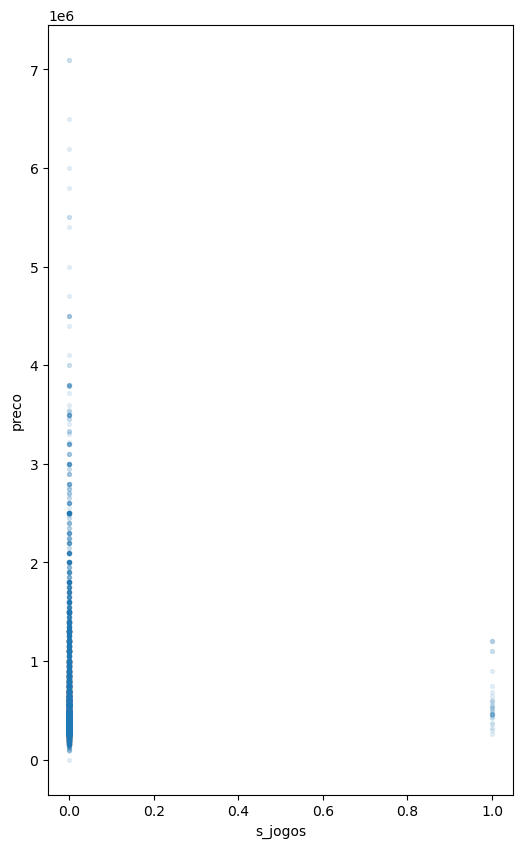

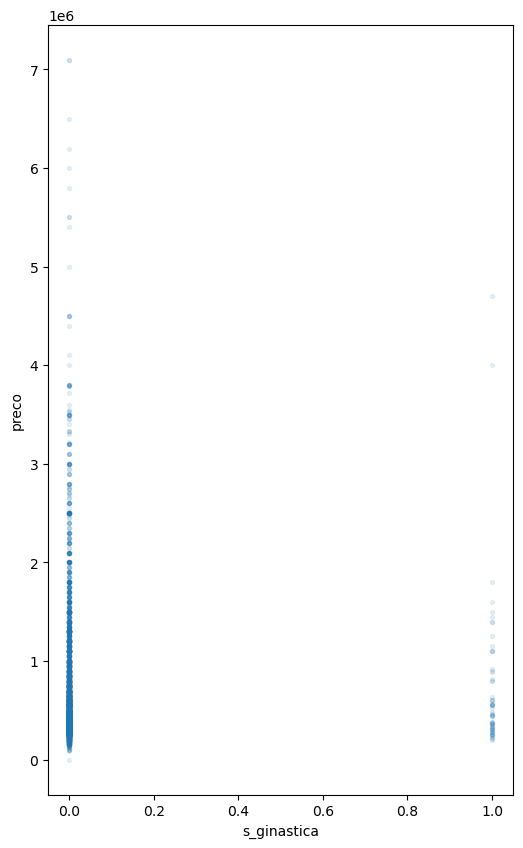

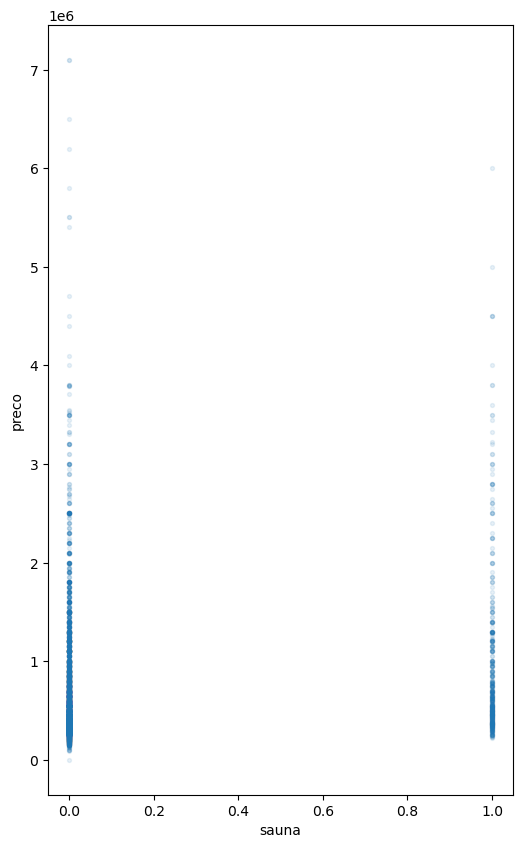

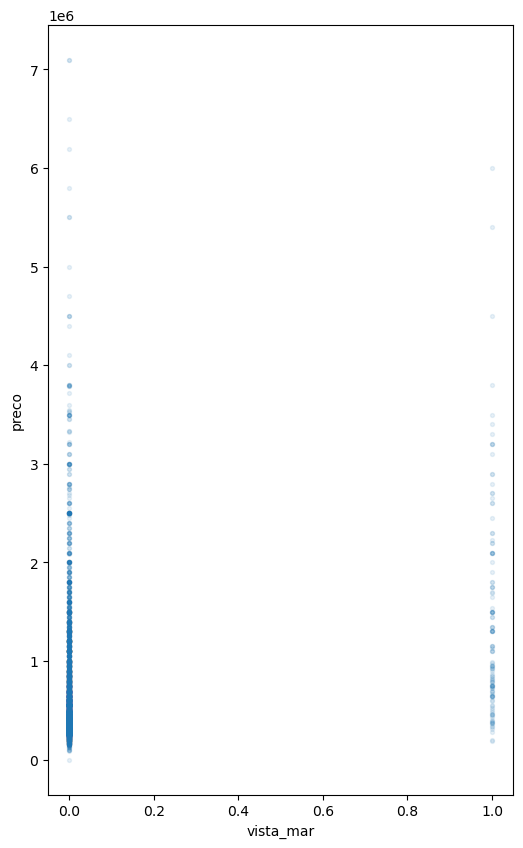

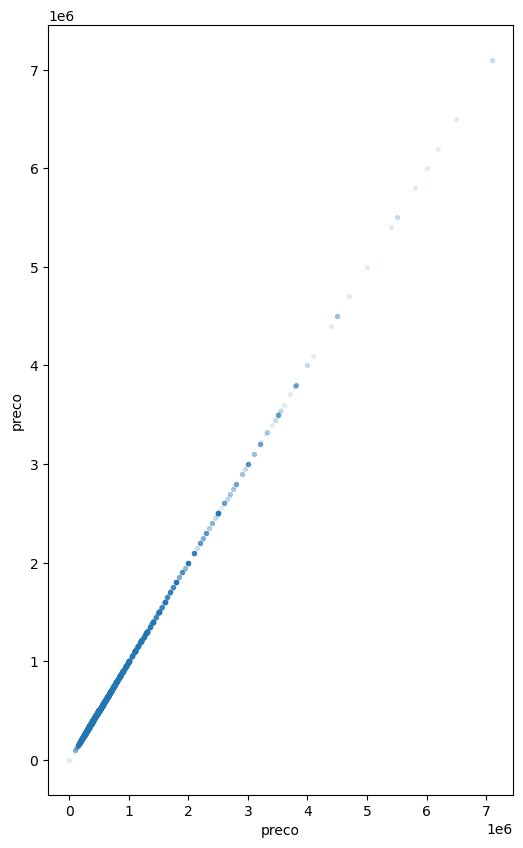

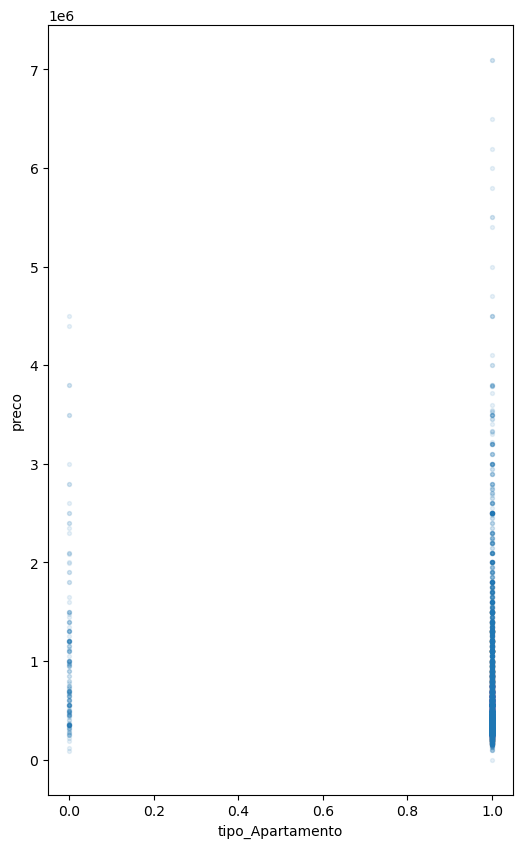

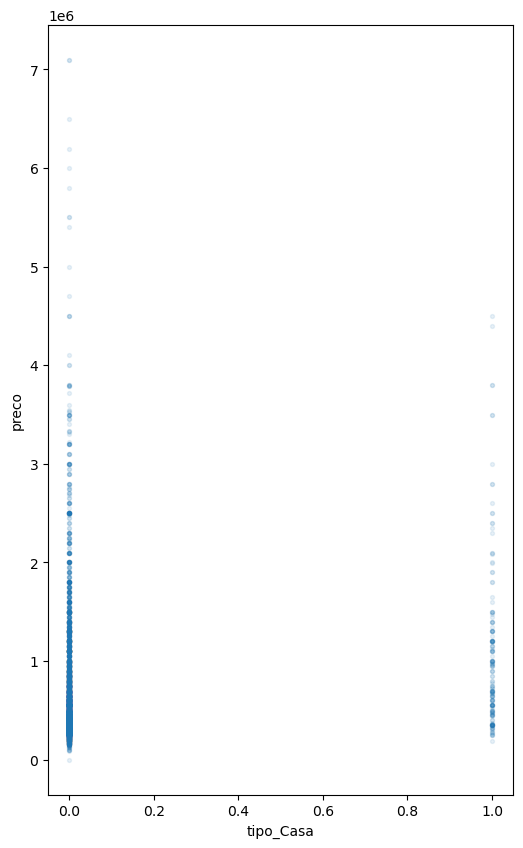

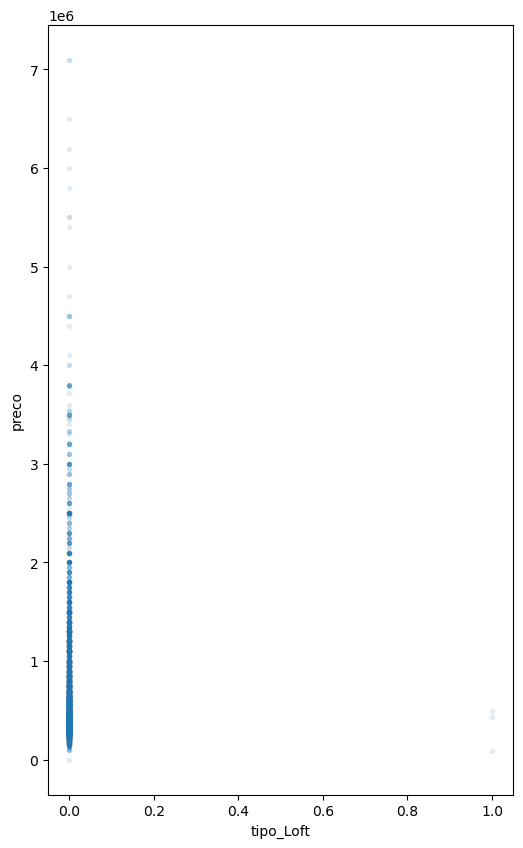

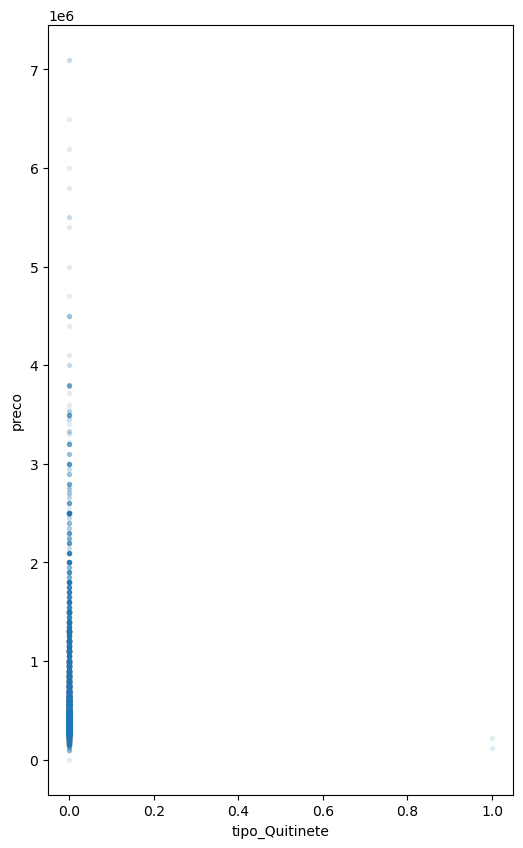

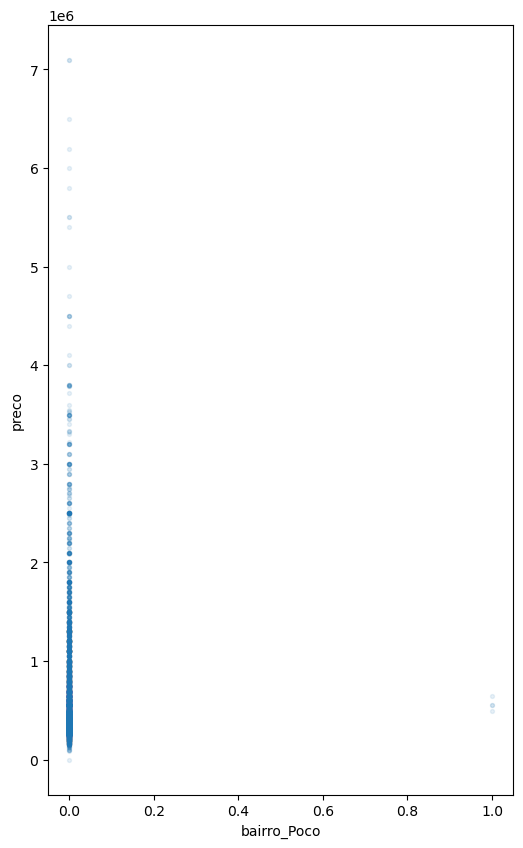

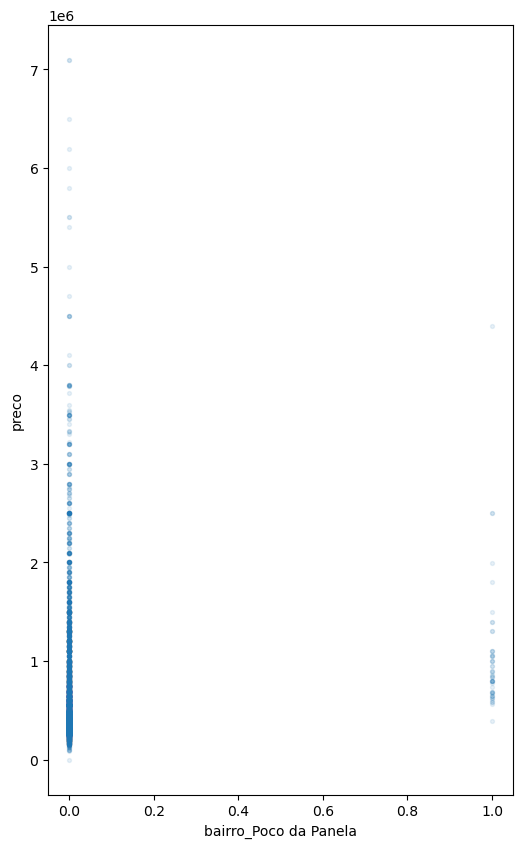

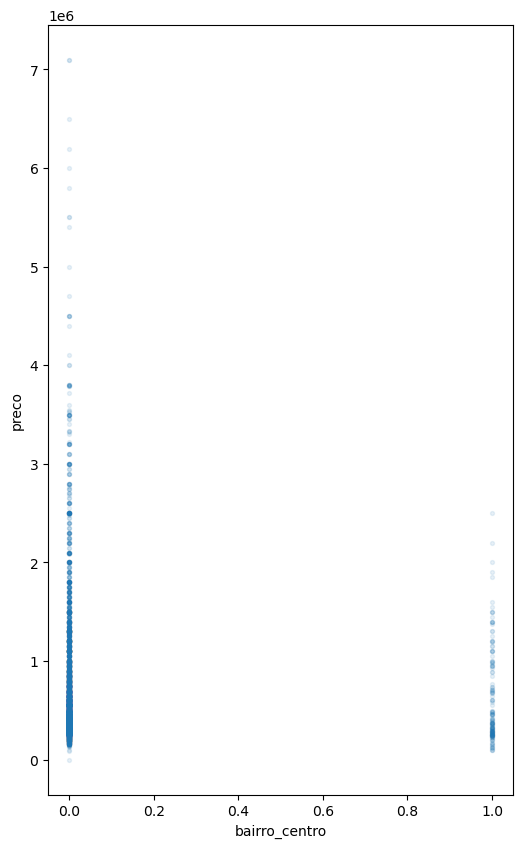

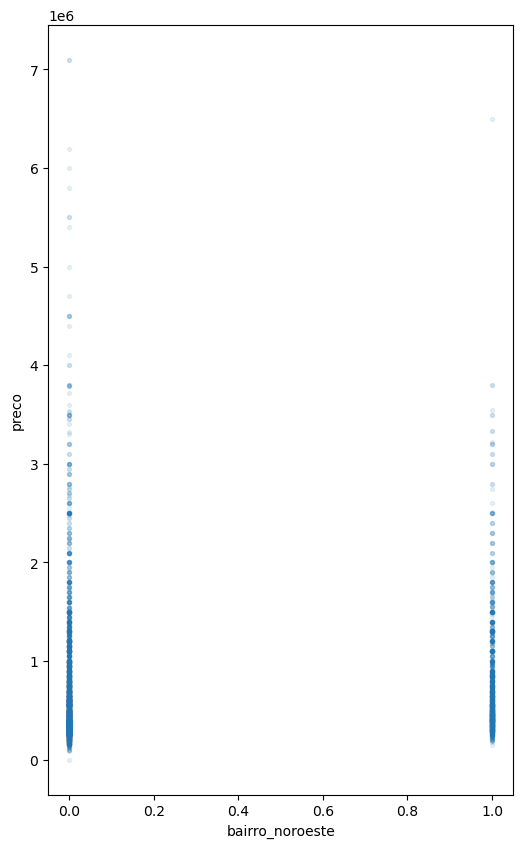

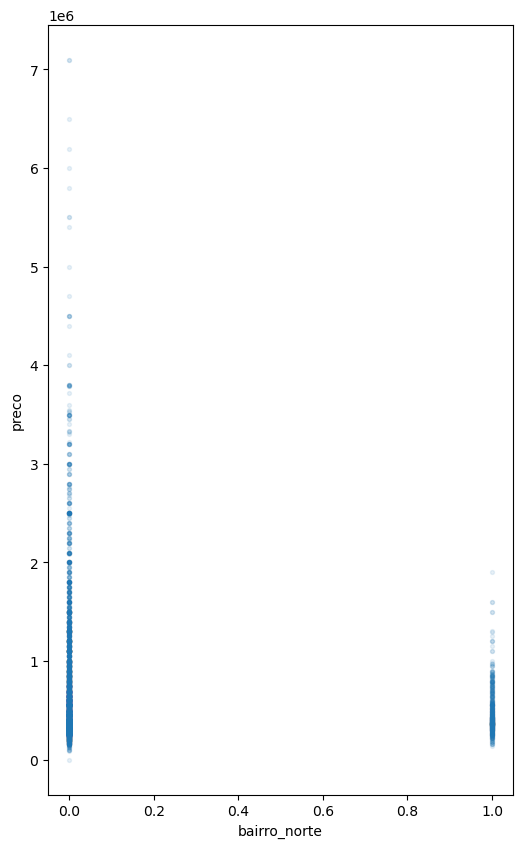

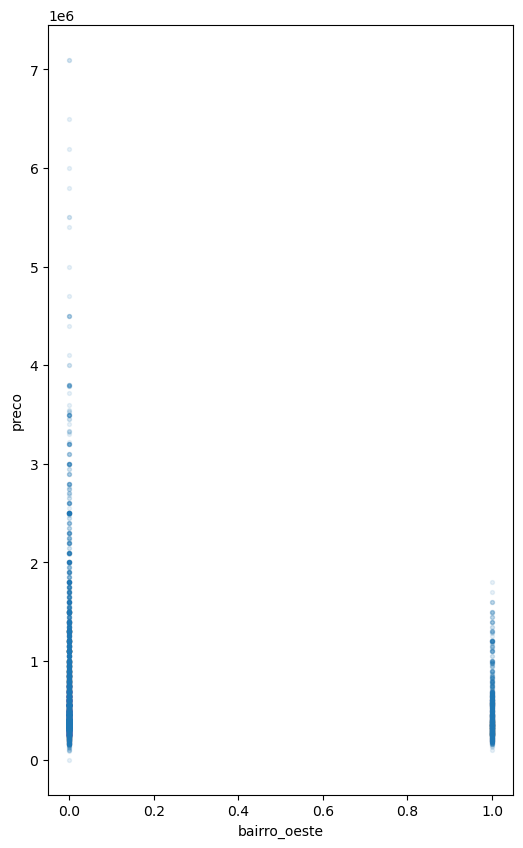

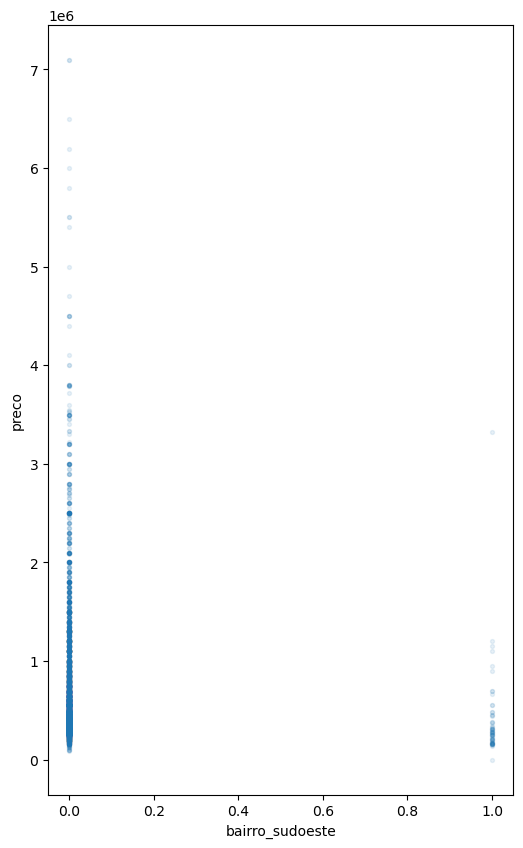

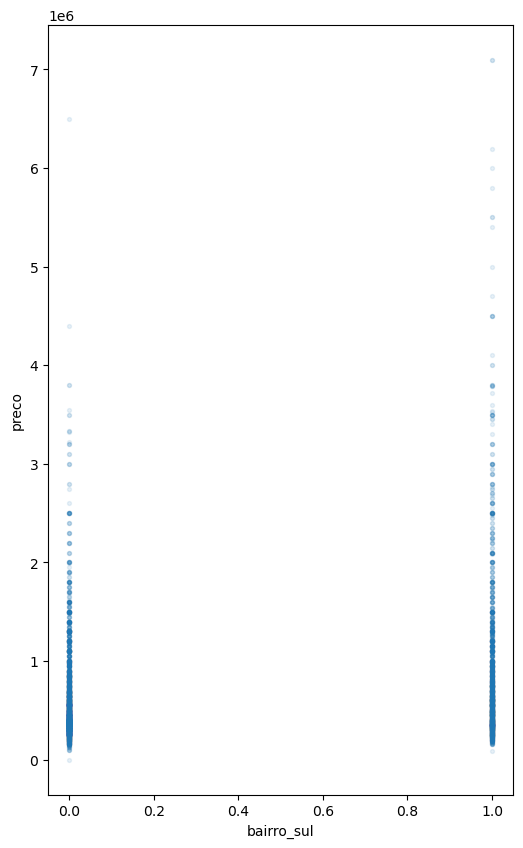

In [8]:
# Plot scatterplots between each attribute and the target.

categories = trainingDataframe.columns
for categorie in categories:
    trainingDataframe.plot.scatter(x = categorie,
                       y = 'preco',
                       s = 8,
                       marker = 'o',
                       alpha = 0.1,
                       figsize = (6,10))

In [9]:
# List the Pearson coefficients between each attribute and the target.

for categorie in categories:
    print('%14s = %6.3f' % (categorie, pearsonr(trainingDataframe[categorie], trainingDataframe['preco'])[0]))

            Id = -0.000
 tipo_vendedor = -0.030
       quartos =  0.564
        suites =  0.687
         vagas =  0.547
     area_util =  0.603
    area_extra =  0.038
  diferenciais =  0.125
 churrasqueira =  0.046
estacionamento = -0.045
       piscina =  0.078
    playground = -0.054
        quadra = -0.003
      s_festas = -0.069
       s_jogos = -0.014
   s_ginastica =  0.003
         sauna =  0.138
     vista_mar =  0.192
         preco =  1.000
tipo_Apartamento = -0.103
     tipo_Casa =  0.109
     tipo_Loft = -0.015
tipo_Quitinete = -0.018
   bairro_Poco = -0.007
bairro_Poco da Panela =  0.058
 bairro_centro = -0.026
bairro_noroeste =  0.046
  bairro_norte = -0.122
  bairro_oeste = -0.173
bairro_sudoeste = -0.060
    bairro_sul =  0.187



Pearson entre variaveis:
tipo_Casa_tipo_Apartamento = -0.986


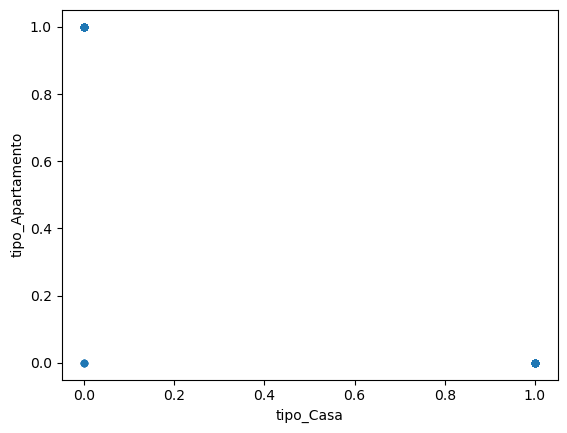

In [10]:
# Explore mutual relationships between attributes.

pearsonFirstAttribute = 'tipo_Casa'
pearsonSecondAttribute = 'tipo_Apartamento'

print('\nPearson entre variáveis:\n%12s = %6.3f' % (
    pearsonFirstAttribute + '_' + pearsonSecondAttribute,
    pearsonr(trainingDataframe[pearsonFirstAttribute], trainingDataframe[pearsonSecondAttribute])[0]))

trainingDataframe.plot.scatter(x = pearsonFirstAttribute, y = pearsonSecondAttribute)

trainingDataframe = trainingDataframe.drop(['quartos'], axis = 1)
testDataframe = testDataframe.drop(['quartos'], axis = 1)

In [11]:
# Transfer attribute values and training labels to X and Y arrays.

categories = trainingDataframe.columns.tolist()
    
categories = ['Id', 'suites', 'vagas', 'area_util', 'diferenciais',  'playground',
           'sauna', 'tipo_Casa', 'bairro_oeste', 'bairro_sul', 'preco']

''' "Loft" and "quitinete" were removed for not having a relevant amount of samples 
and for not having a direct determining factor for the value of the properties in question. '''

trainingDataframe = trainingDataframe[categories]

id = testDataframe['Id']

categories.remove('Id')
categories.remove('preco')

# Contains the attributes that will be used to predict.
testDataframe = testDataframe[categories] 

attributes = trainingDataframe.iloc[:,1:-1].to_numpy()
targetFeedback = trainingDataframe.iloc[:,-1].to_numpy()

print('\n\n', targetFeedback)



 [1000000.  680000.  450000. ...  252000.  780000.  577035.]


In [12]:
# Adjust the scale of the variables.

scaleAdjuster = MinMaxScaler()
scaleAdjuster.fit(attributes)
attributes = scaleAdjuster.transform(attributes)

testDataframe = scaleAdjuster.transform(testDataframe)

C:\Users\luiza\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [13]:
# Partition X and Y into training set and test.

trainingAttribute, testAttribute, targetTraining, targetTest = train_test_split(
    attributes,
    targetFeedback,
    test_size = 0.2,
    random_state = 111  
    )

In [14]:
# Define error metric for evaluation.

import numpy as np

def RMSPE(yi_g, yi_r):
    return np.sqrt(np.mean(np.square(((yi_g - yi_r)/yi_g)), axis=0))

In [15]:
# Train and test a linear POLYNOMIAL regressor for degrees 1 to 5.

print('\n')
print(' REGRESSOR POLINOMIAL DE GRAU K')
print('\n')

print('   K    Amostras de TREINO  Amostras de TESTE')
print(' ---    ------------------  -----------------')

for k in range(1,3):
    
    polynomialFeatures = PolynomialFeatures(degree=k)
    
    polynomialFeatures = polynomialFeatures.fit(trainingAttribute)
    
    polynomialTrainingAttributes = polynomialFeatures.transform(trainingAttribute)
    polynomialTestAttributes  = polynomialFeatures.transform(testAttribute)
    
    regressor_linear = LinearRegression()
    
    regressor_linear = regressor_linear.fit(polynomialTrainingAttributes,targetTraining)
    
    targetResponseTraining = regressor_linear.predict(polynomialTrainingAttributes)
    targetResponseTest  = regressor_linear.predict(polynomialTestAttributes)

    rmspeTraining = RMSPE(targetTraining, targetResponseTraining)
    rmspeTest = RMSPE(targetTest,  targetResponseTest)
 
    print(' %3d    %18.4f  %17.4f' % \
          (k, rmspeTraining, rmspeTest))



 REGRESSOR POLINOMIAL DE GRAU K


   K    Amostras de TREINO  Amostras de TESTE
 ---    ------------------  -----------------
   1                2.7317             0.4913
   2                5.2251             0.4632


In [16]:
# Train and test a RIDGE regressor for grades 1 to 5.

print('\n')
print(' REGRESSOR POLINOMIAL DE GRAU K COM REGULARIZACAO RIDGE (L2)')
print('\n')

print('   K      NA  Amostras de TREINO  Amostras de TESTE')
print(' ---    ----  ------------------  -----------------')

for k in range(1, 6):
    
    polynomialFeatures = PolynomialFeatures(degree = k)
    
    polynomialFeatures = polynomialFeatures.fit(trainingAttribute)
    polynomialTrainingAttributes = polynomialFeatures.transform(trainingAttribute)
    polynomialTestAttributes = polynomialFeatures.transform(testAttribute)
    
    ridgeRegressor = Ridge(alpha = 0.01)
    
    ridgeRegressor = ridgeRegressor.fit(polynomialTrainingAttributes, targetTraining)
    targetResponseTraining = ridgeRegressor.predict(polynomialTrainingAttributes)
    targetResponseTest = ridgeRegressor.predict(polynomialTestAttributes)

    rmspeTraining = RMSPE(targetTraining, targetResponseTraining)
    rmspeTest = RMSPE(targetTest, targetResponseTest)

    nAttributes = polynomialTrainingAttributes.shape[1]    

    print(' %3d  %6d  %18.4f  %17.4f' % \
          (k, nAttributes, rmspeTraining, rmspeTest))



 REGRESSOR POLINOMIAL DE GRAU K COM REGULARIZACAO RIDGE (L2)


   K      NA  Amostras de TREINO  Amostras de TESTE
 ---    ----  ------------------  -----------------
   1      10              2.7310             0.4910
   2      55              5.3153             0.3902
   3     220              5.8999             0.3378
   4     715              5.3989             0.3927
   5    2002              5.1395             0.5359


In [17]:
# Get the regression responses on the test set.

polynomialFeatures = PolynomialFeatures(degree = 3)
polynomialFeatures = polynomialFeatures.fit(attributes)

polynomialAttributes = polynomialFeatures.transform(attributes)
polynomialTestDataframe = polynomialFeatures.transform(testDataframe)

ridgeRegressor = Ridge(alpha = 0.01)
ridgeRegressor = ridgeRegressor.fit(polynomialAttributes, targetFeedback)

answers = ridgeRegressor.predict(polynomialTestDataframe)
answers = [round(answer, 2) for answer in answers]

output = pd.DataFrame(list(zip(id, answers)), columns = ['Id','preco'])

output.to_csv('regression_answer.csv', index = False)

Bibliografia: <br>
    - <a href="https://scikit-learn.org/stable/index.html">Scikit-learn</a> <br>
    - <a href="https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Subdivis%C3%B5es_de_Recife">Subdivisões de Recife</a>